### THEORY AND INTUITION

In [1]:
# easy to understand and visulaize
# helps users decide how many clusters to choose
# not necessary to choose clusters before running

# divides points into potentoial clusters

# Agglomerative approach
# each points begins as its own cluster then clusters are joined
# wethen decide which point is similar and then start making clusters
# compare data points to find the most similar data pnts to each other
# merge these to create a cluster
# compare clusters to find most similar clusters and merge again
# repeat until all points in a single cluster

# to understand:
# similarity metric (euclidean as default)
# dendogram
#     plot displaying all the potential clusters
#     very computationally expensive to compute and display for larger data sets
#     very useful for deciding on number of clusters
# linkage matrix
#     ward -> minimizes variance of clusters being merged
#     Average -> avg distance btw two sets
#     Min or Max -> distances btw all obs of the two sets

# Divisive Approach
# all points begin in the same cluster then clusters are split

### CODING PART 1 : DATA AND VISUALIZATION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('cluster_mpg.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [9]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
# for hierarchical clustering we are using min max sclaer instead of normal one

In [11]:
scaler = MinMaxScaler()

In [13]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [14]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [17]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)

<AxesSubplot:>

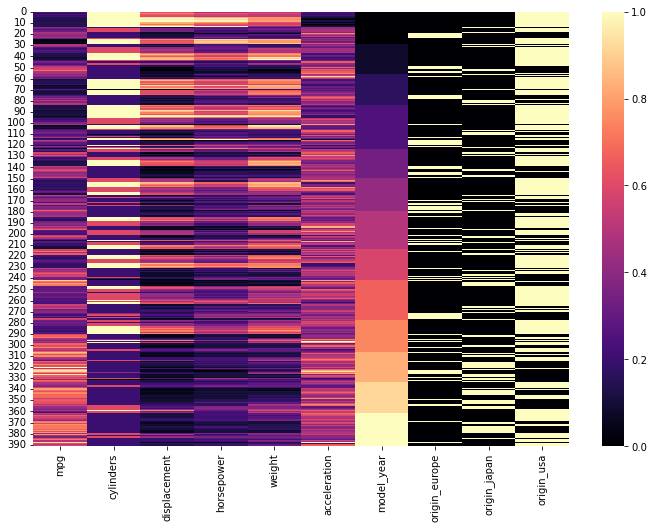

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(scaled_df, cmap='magma')

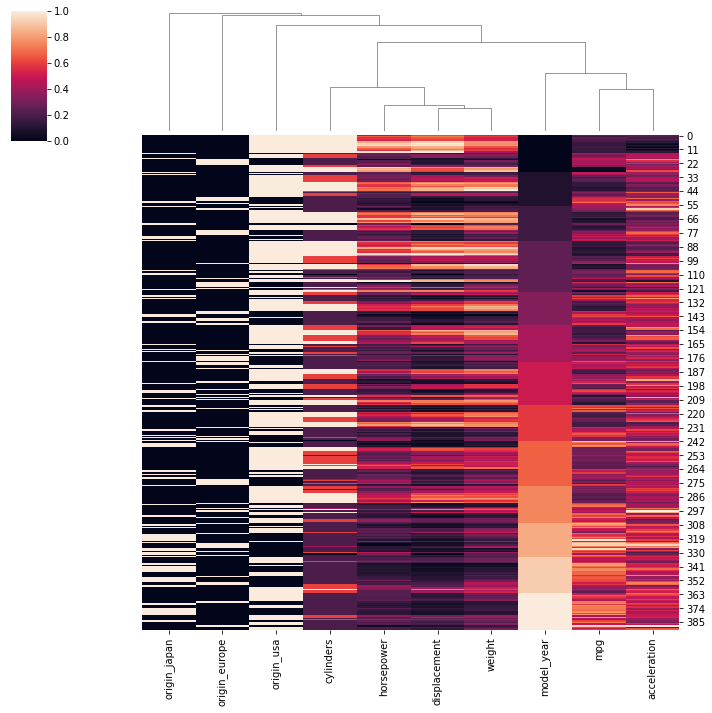

In [23]:
sns.clustermap(scaled_df, row_cluster=False)
# the dummy variable would be the last to be cliustered as they are the most dissimilar

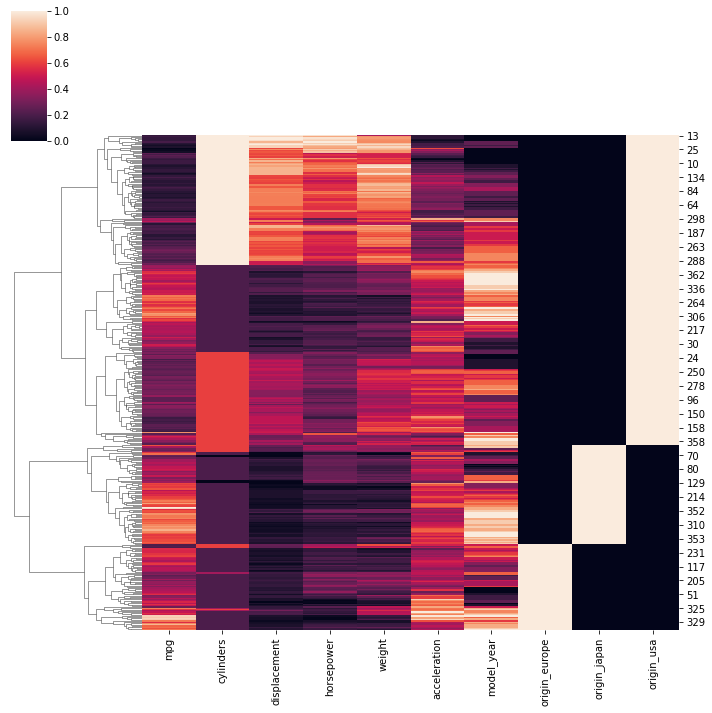

In [25]:
sns.clustermap(scaled_df, col_cluster=False)

### CODING PART 2 : CLUSTERS AND DENDOGRAMS

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
model = AgglomerativeClustering(n_clusters=4)

In [33]:
# scaled_df
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

In [32]:
cluster_labels = model.fit_predict(scaled_df)

In [34]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

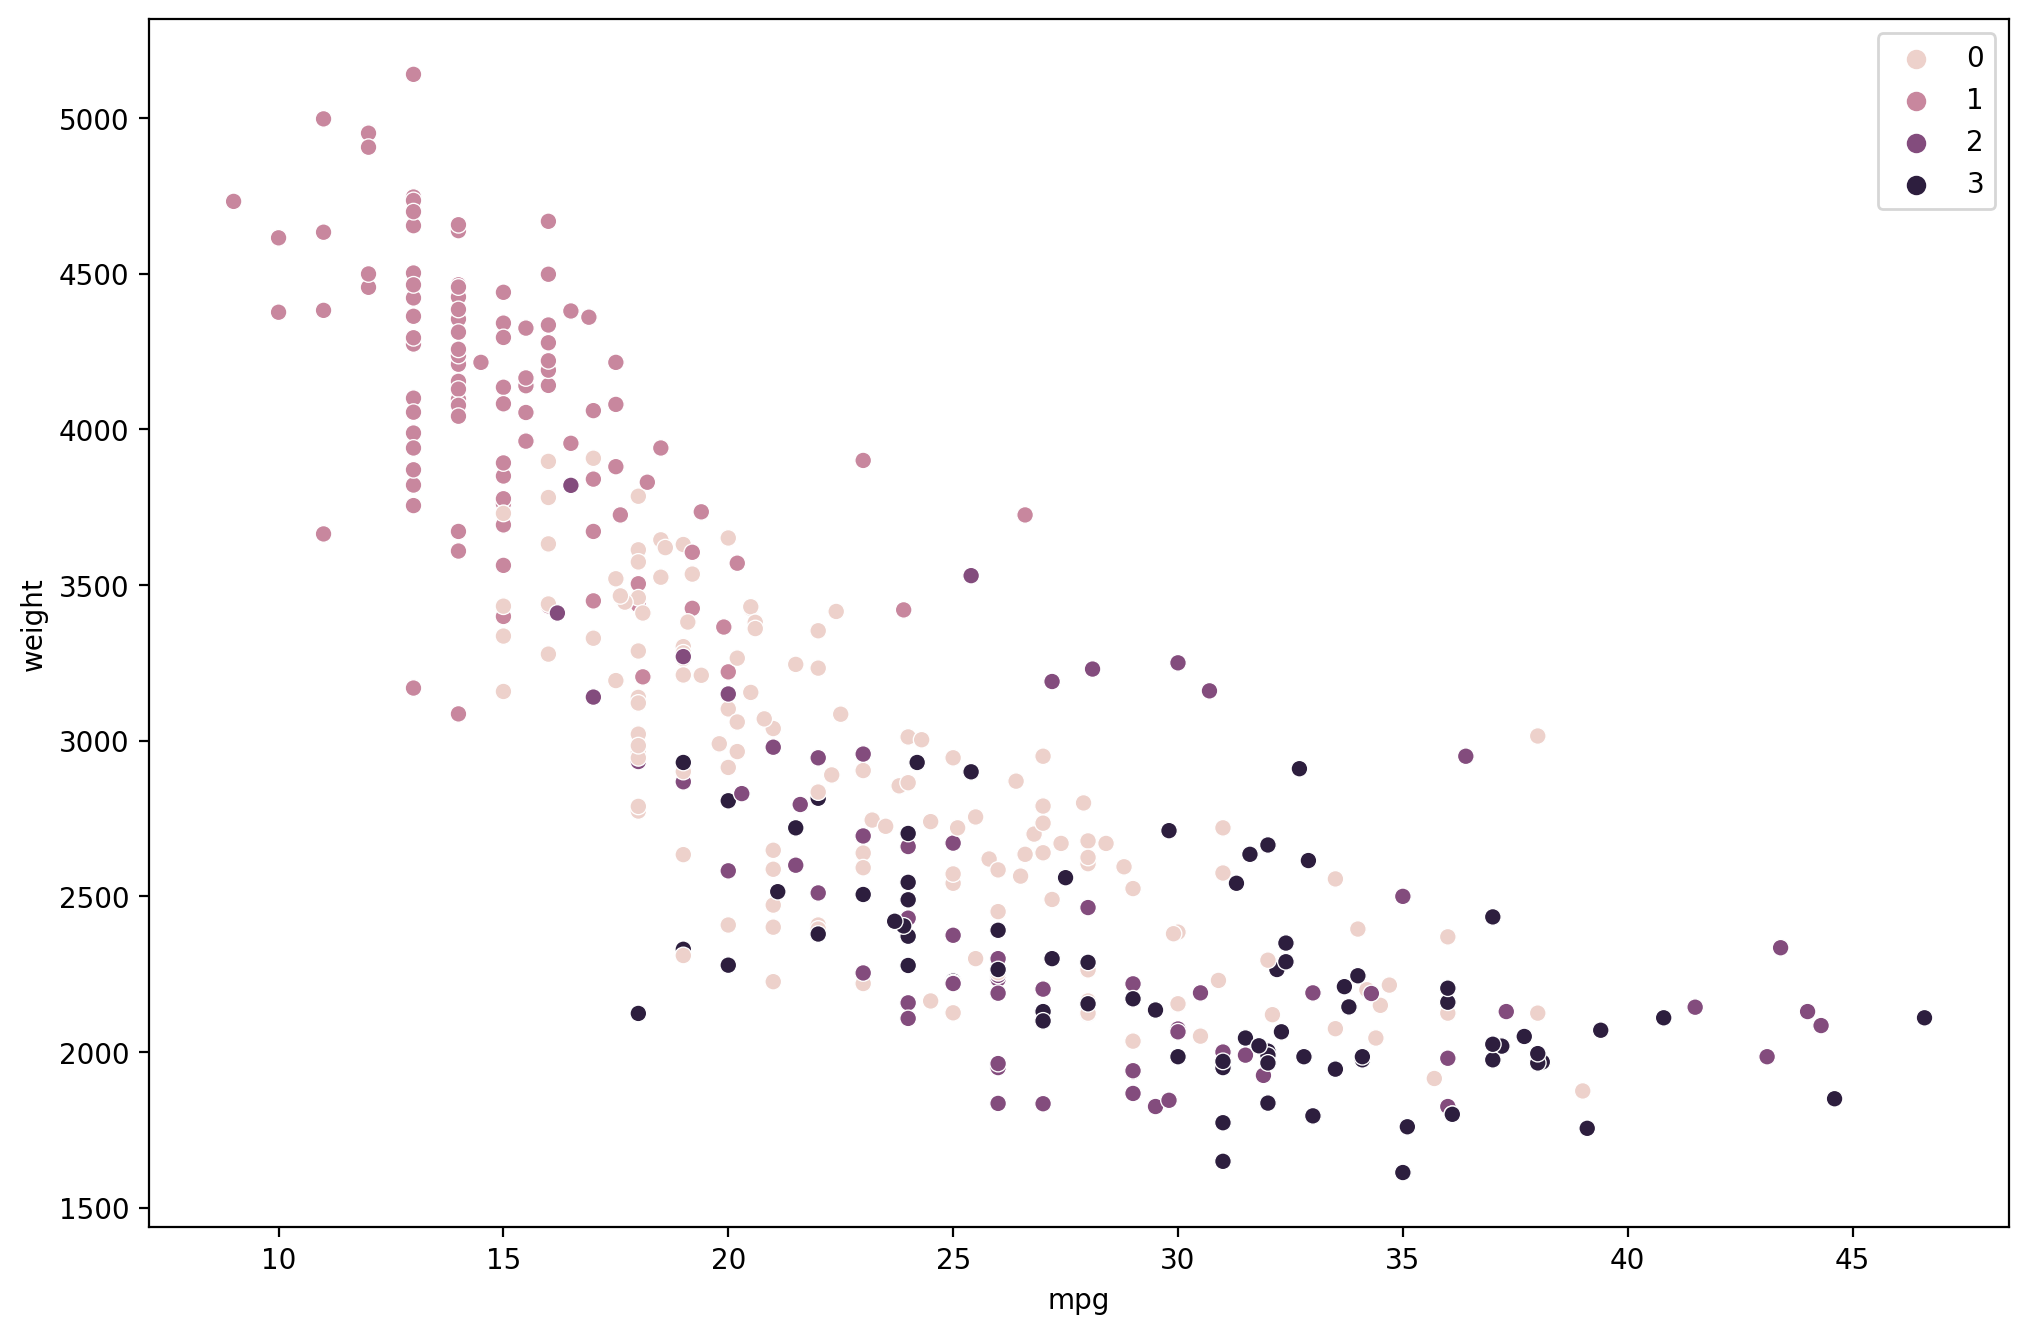

In [39]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

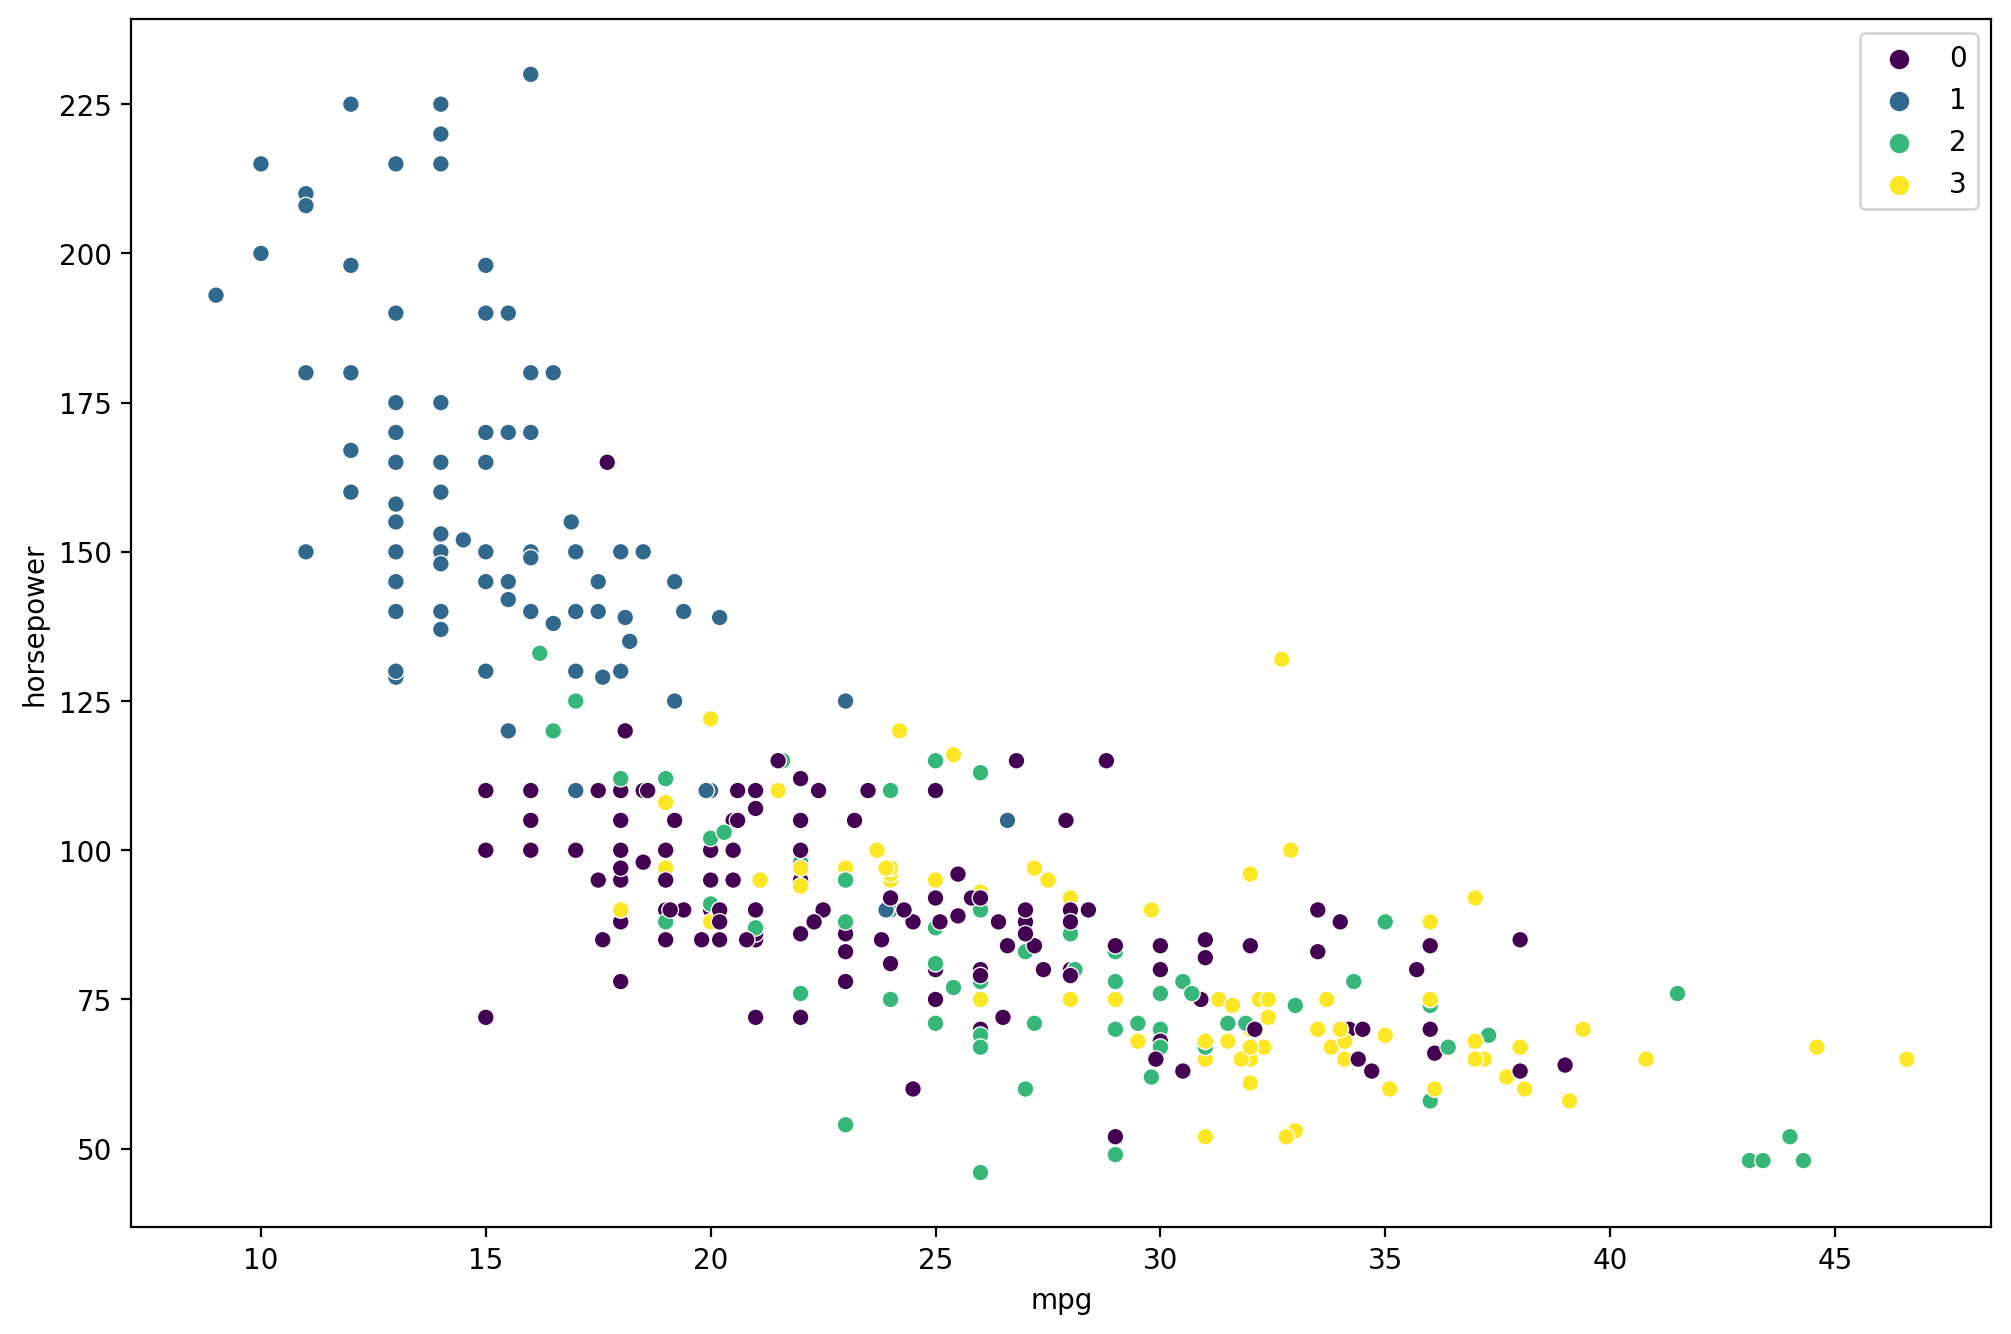

In [42]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels, palette='viridis')

In [44]:
# keep the affinity equal to euclidean which is the default
# euclidean is basically the pythogoras theoram
# using the minmax scaling, we know what the max value will be
# max distance possible?
# sqrt(N_features)

In [45]:
len(scaled_df.columns)

10

In [47]:
np.sqrt(10) # Max distance possible between two points (Min/Max scaling)

3.1622776601683795

In [88]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
# if we set n_clusters to none we have to set linkage distance threshold
# setting distance threshold to be 0 we create max number of clusters

In [89]:
cluster_labels = model.fit_predict(scaled_df)
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

In [93]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix
# 67 and 161 are both clusters
# 1.41 is the distance between the points
# 2is the number of  points falling under thsi linkage or connection

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

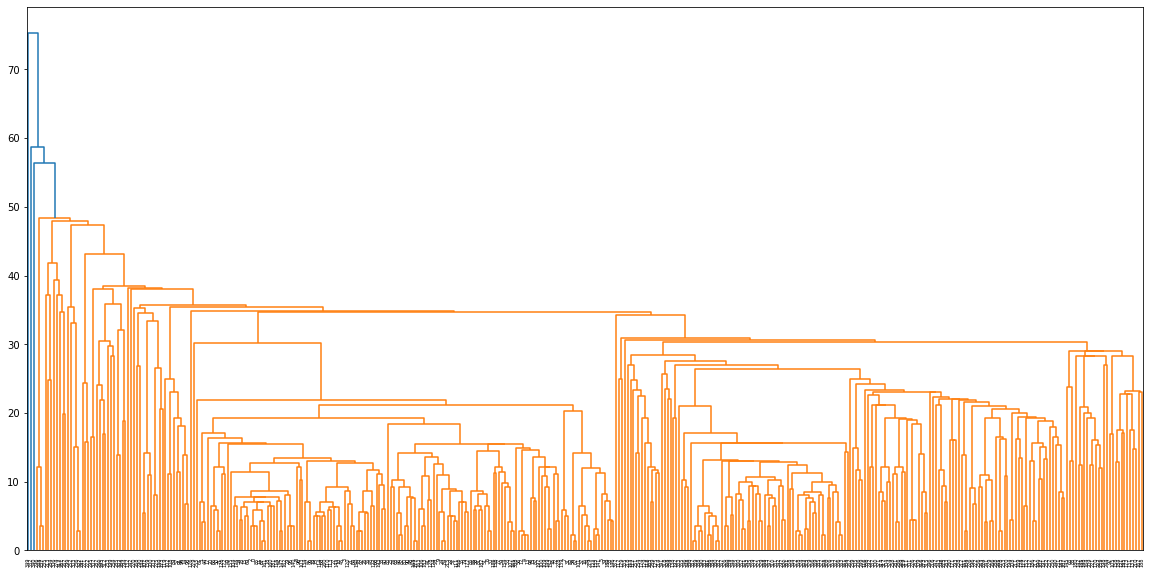

In [94]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix)

In [95]:
# we now through visualizaiton decide where do we have to cut using the truncate mode in scipy

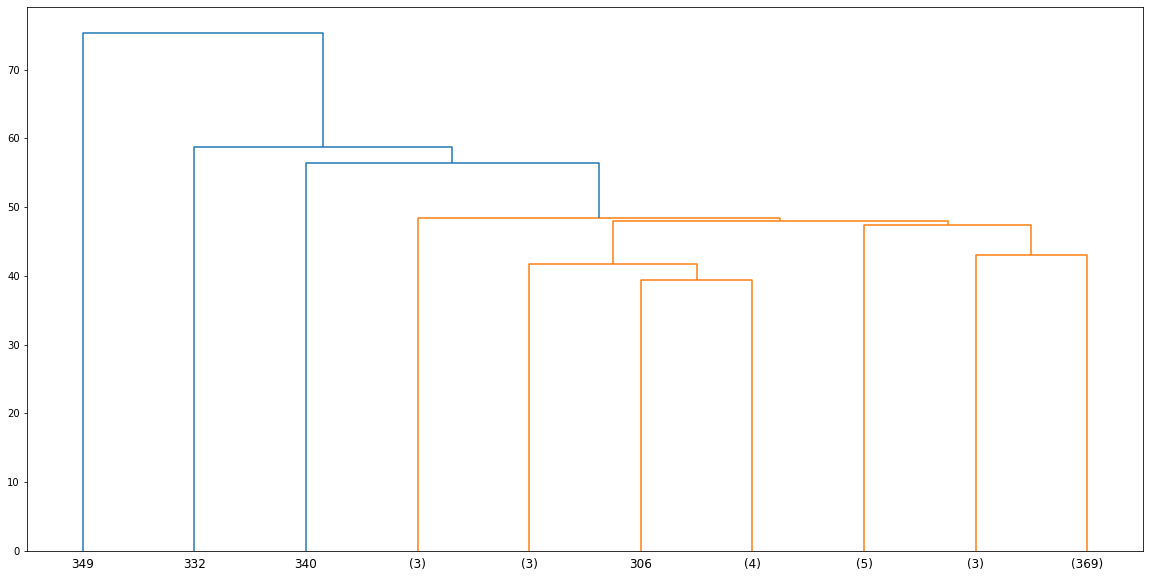

In [96]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)

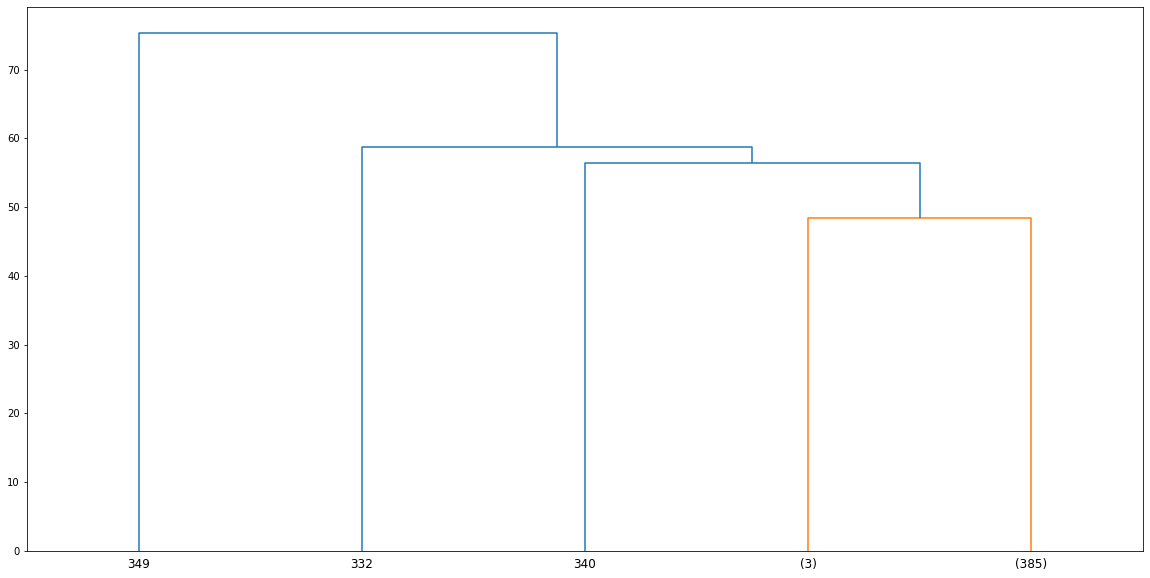

In [97]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix, truncate_mode='level', p=3)

In [98]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [100]:
scaled_df['mpg'].idxmax()

320

In [101]:
scaled_df['mpg'].idxmin()

28

In [102]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [103]:
distance = np.linalg.norm(car_a-car_b)

In [104]:
distance

2.3852929970374714

In [105]:
# it is a good idea to put distance threshold to be 2 or 3